# Preparando el ambiente

In [236]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import requests

#📌 Extracción

In [237]:
#Pedimos los datos del json desde la API

rq = requests.get("https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/refs/heads/main/TelecomX_Data.json")

if rq.status_code == 200:
    data =  rq.json()
    bd = pd.json_normalize(data)
else:
    print("Error en la extracción de la base de datos")


#🔧 Transformación

In [238]:
bd.head(2)

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,internet.OnlineSecurity,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4


Nombres en español y descriptivos para la base de datos

In [239]:
bd.rename(columns={
    'customerID': 'ID_Cliente',
    'Churn': 'Fuga_Cliente',
    'customer.gender': 'Genero_Cliente',
    'customer.SeniorCitizen': 'Cliente_TerceraEdad',
    'customer.Partner': 'Cliente_ConPareja',
    'customer.Dependents': 'Cliente_ConDependientes',
    'customer.tenure': 'Antiguedad_Meses',
    'phone.PhoneService': 'Servicio_Telefonico',
    'phone.MultipleLines': 'Multiples_Lineas_Telefonicas',
    'internet.InternetService': 'Servicio_Internet',
    'internet.OnlineSecurity': 'Seguridad_Online',
    'internet.OnlineBackup': 'Copia_Seguridad_Online',
    'internet.DeviceProtection': 'Proteccion_Dispositivo',
    'internet.TechSupport': 'Soporte_Tecnico',
    'internet.StreamingTV': 'Streaming_TV',
    'internet.StreamingMovies': 'Streaming_Peliculas',
    'account.Contract': 'Tipo_Contrato',
    'account.PaperlessBilling': 'Facturacion_Electronica',
    'account.PaymentMethod': 'Metodo_Pago',
    'account.Charges.Monthly': 'Cargos_Mensuales',
    'account.Charges.Total': 'Cargos_Totales'
}, inplace=True)

In [240]:
bd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ID_Cliente                    7267 non-null   object 
 1   Fuga_Cliente                  7267 non-null   object 
 2   Genero_Cliente                7267 non-null   object 
 3   Cliente_TerceraEdad           7267 non-null   int64  
 4   Cliente_ConPareja             7267 non-null   object 
 5   Cliente_ConDependientes       7267 non-null   object 
 6   Antiguedad_Meses              7267 non-null   int64  
 7   Servicio_Telefonico           7267 non-null   object 
 8   Multiples_Lineas_Telefonicas  7267 non-null   object 
 9   Servicio_Internet             7267 non-null   object 
 10  Seguridad_Online              7267 non-null   object 
 11  Copia_Seguridad_Online        7267 non-null   object 
 12  Proteccion_Dispositivo        7267 non-null   object 
 13  Sop

Ahora, de acuerdo al resultado del comando .info() previo, se evidencia que una de las columnas que debería ser de tipo float64, en este caso Cargos_Totales, aparece como tipo object. Por lo tanto, se procede a intentar convertirla.

In [241]:
try:
  aux = pd.to_numeric(bd["Cargos_Totales"])
except ValueError as e:
  print(f"Hubo un error en el casting, los detalles son: {e.args}")


Hubo un error en el casting, los detalles son: ('Unable to parse string " " at position 975',)


Se evidencia la presencia de un valor no válido en la fila 975, el cual corresponde a un espacio en blanco (" "). Para asegurar que no existan más valores anómalos en la columna, se combierte cualquier valor diferente a un numero a numpy.nan.

In [242]:
try:
  bd["Cargos_Totales"] = pd.to_numeric(bd["Cargos_Totales"], errors="coerce")
except ValueError as e:
  print(f"Hubo un error en el casting, los detalles son: {e.args}")

Luego de convertir todos los valores atípicos (outliers) en NaN, se procede a verificar la cantidad existente. Si esta supera el 5%, se reemplazarán dichos valores por la mediana; de lo contrario, se eliminarán.

In [243]:
per_nan = bd["Cargos_Totales"].isna().sum()/len(bd)*100
print(f"Los nulos representan el {per_nan:.2f}% de la base de datos")


Los nulos representan el 0.15% de la base de datos


In [244]:
#Se procede a eliminar los valores NaN de la columna "Cargos_Totales"
bd = bd.dropna(subset="Cargos_Totales")

In [245]:
#Se comprueba si la base de datos sigue teniendo valores NaN dentro de la columna "Cargos_Totales"
print(f"Los valores nulos dentro de la columna Cargos_Totales son: {bd["Cargos_Totales"].isna().sum():,.0f}")

Los valores nulos dentro de la columna Cargos_Totales son: 0


Ahora es apropiado revisar cuáles son los valores que existen para cada columna.

In [246]:
bd.apply(pd.unique)

,0
ID_Cliente,"[0002-ORFBO, 0003-MKNFE, 0004-TLHLJ, 0011-IGKF..."
Fuga_Cliente,"[No, Yes, ]"
Genero_Cliente,"[Female, Male]"
Cliente_TerceraEdad,"[0, 1]"
Cliente_ConPareja,"[Yes, No]"
Cliente_ConDependientes,"[Yes, No]"
Antiguedad_Meses,"[9, 4, 13, 3, 71, 63, 7, 65, 54, 72, 5, 56, 34..."
Servicio_Telefonico,"[Yes, No]"
Multiples_Lineas_Telefonicas,"[No, Yes, No phone service]"
Servicio_Internet,"[DSL, Fiber optic, No]"


A continuación, se reemplazarán todos los valores "Yes" por 1. Además, los valores "No", "No internet service" y "No phone service" se sustituirán por 0, con el fin de facilitar el análisis estadístico y el procesamiento de la base de datos. Asimismo, como se observa en el cuadro anterior, existe un valor anómalo en la columna "Fuga_Cliente" correspondiente a un espacio en blanco (" "), el cual será convertido a pd.NA para su posterior eliminación en caso su presencia represente menos del 5% de los datos.

In [247]:
diccionario_cambios = {
    "No" : 0,
    "Yes" : 1,
    "No internet service" : 0,
    "No phone service" : 0,
    "" : pd.NA,
    "Male":"Masculino",
    "Female":"Femenino"
}

In [248]:
columns_aux = bd.drop(columns=["ID_Cliente","Antiguedad_Meses","Cargos_Mensuales","Cargos_Totales","Servicio_Internet"]).columns
bd[columns_aux] = bd[columns_aux].replace(diccionario_cambios)

/tmp/ipython-input-4252101586.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  bd[columns_aux] = bd[columns_aux].replace(diccionario_cambios)


In [249]:
per_nan = bd["Fuga_Cliente"].isna().sum()/len(bd)*100
print(f"Las filas con valores nulos de la columna 'Fuga_Cliente' representan un {per_nan:,.0f}% de los datos del dataframe")

Las filas con valores nulos de la columna 'Fuga_Cliente' representan un 3% de los datos del dataframe


In [250]:
bd["Fuga_Cliente"].unique()

array([0, 1, <NA>], dtype=object)

In [251]:
# Se eliminan los NaN
bd.dropna(inplace=True)

In [252]:
bd["Fuga_Cliente"].unique()

array([0, 1], dtype=object)

Se realiza una validación final del conjunto de datos para garantizar la ausencia de valores irregulares en las columnas modificadas, asegurando así la integridad de la información antes del análisis.

In [253]:
columns_aux = bd.drop(columns=["ID_Cliente","Antiguedad_Meses","Cargos_Mensuales","Cargos_Totales"])
columns_aux.apply(pd.unique)

,0
Fuga_Cliente,"[0, 1]"
Genero_Cliente,"[Femenino, Masculino]"
Cliente_TerceraEdad,"[0, 1]"
Cliente_ConPareja,"[1, 0]"
Cliente_ConDependientes,"[1, 0]"
Servicio_Telefonico,"[1, 0]"
Multiples_Lineas_Telefonicas,"[0, 1]"
Servicio_Internet,"[DSL, Fiber optic, No]"
Seguridad_Online,"[0, 1]"
Copia_Seguridad_Online,"[1, 0]"


Por último, convertimos las columnas a su tipo correspondiente en función del tipo de datos que tengan.

In [254]:
bd = bd.convert_dtypes(convert_string=True)
bd.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ID_Cliente                    7032 non-null   string 
 1   Fuga_Cliente                  7032 non-null   Int64  
 2   Genero_Cliente                7032 non-null   string 
 3   Cliente_TerceraEdad           7032 non-null   Int64  
 4   Cliente_ConPareja             7032 non-null   Int64  
 5   Cliente_ConDependientes       7032 non-null   Int64  
 6   Antiguedad_Meses              7032 non-null   Int64  
 7   Servicio_Telefonico           7032 non-null   Int64  
 8   Multiples_Lineas_Telefonicas  7032 non-null   Int64  
 9   Servicio_Internet             7032 non-null   string 
 10  Seguridad_Online              7032 non-null   Int64  
 11  Copia_Seguridad_Online        7032 non-null   Int64  
 12  Proteccion_Dispositivo        7032 non-null   Int64  
 13  Soporte_

# 📊 Carga y análisis

In [255]:
bd.describe()

,Fuga_Cliente,Cliente_TerceraEdad,Cliente_ConPareja,Cliente_ConDependientes,Antiguedad_Meses,Servicio_Telefonico,Multiples_Lineas_Telefonicas,Seguridad_Online,Copia_Seguridad_Online,Proteccion_Dispositivo,Soporte_Tecnico,Streaming_TV,Streaming_Peliculas,Facturacion_Electronica,Cargos_Mensuales,Cargos_Totales
count,7032.0,7032.0,7032.0,7032.0,7032.0,7032.0,7032.0,7032.0,7032.0,7032.0,7032.0,7032.0,7032.0,7032.0,7032.0,7032.0
mean,0.265785,0.1624,0.482509,0.298493,32.421786,0.903299,0.421928,0.286547,0.344852,0.343857,0.290102,0.384386,0.388367,0.592719,64.798208,2283.300441
std,0.441782,0.368844,0.499729,0.457629,24.54526,0.295571,0.493902,0.45218,0.475354,0.475028,0.453842,0.486484,0.487414,0.491363,30.085974,2266.771362
min,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,18.25,18.8
25%,0.0,0.0,0.0,0.0,9.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,35.5875,401.45
50%,0.0,0.0,0.0,0.0,29.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,70.35,1397.475
75%,1.0,0.0,1.0,1.0,55.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,89.8625,3794.7375
max,1.0,1.0,1.0,1.0,72.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,118.75,8684.8


Primero se cuentan las veces que se repite el 1 y 0 dentro de la columna "Fuga_Cliente" para determinar que proporción de clientes fugo dentro del periodo.

In [256]:
proporcion_fuga = bd["Fuga_Cliente"].value_counts()
proporcion_fuga.index = ["Fuga", "No Fuga"]

Se crea un grafico de pastel que representa la proporción de personas que dejaron y que decidieron seguir consumiendo los servicios de "Telecom X".

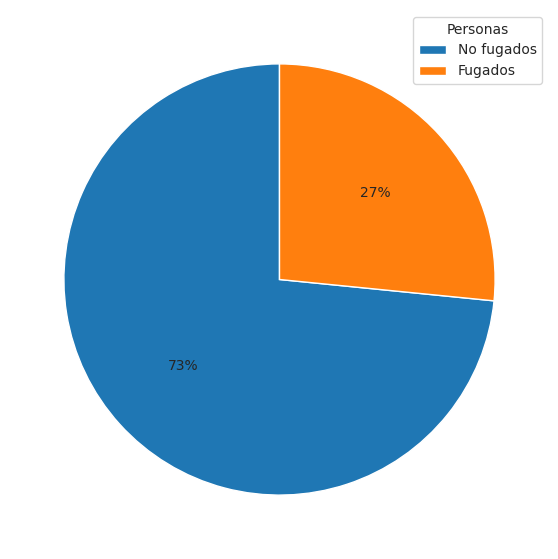

In [257]:
fig, ax = plt.subplots(figsize=(7,7))
ax.pie(proporcion_fuga,labels=None, startangle=90, autopct="%1.0f%%")
ax.legend(title="Personas", loc="best", labels=["No fugados","Fugados"])
fig.show()

Se crea una función para extraer DataFrames con la información de los clientes que fugaron y los que no, basándose en una característica específica de una columna.

In [258]:
def obtener_fuga(df, nombre_columna, condicion):

  if nombre_columna not in df.columns:
    print(f"No existe la columna `{nombre_columna}`")
    return pd.NA


  if condicion not in df[nombre_columna].values:
    print(f"No existe el valor `{condicion}` dentro de la columna `{nombre_columna}`")
    return pd.NA

  fuga_aux = df.loc[df[nombre_columna]==condicion,:]
  fuga_aux = fuga_aux["Fuga_Cliente"].value_counts()
  fuga_aux = pd.DataFrame(fuga_aux)
  fuga_aux.rename(index={0:"No fugaron", 1:"Si fugaron"}, columns={"count":f"{nombre_columna}_{condicion}"}, inplace=True)

  return fuga_aux

Se implementa un ciclo for para iterar sobre los valores únicos de las columnas y generar subconjuntos de datos (DataFrames) independientes para cada categoría que seran insertados dentro de una lista para luego unirlos.

In [259]:
bd_ca = bd.drop(columns=["ID_Cliente","Antiguedad_Meses","Cargos_Mensuales","Cargos_Totales","Servicio_Internet"])
df_aux = []

for columnas in bd_ca.columns:
    for caracteristica in bd_ca[columnas].unique():
      aux = obtener_fuga(bd_ca, columnas, caracteristica)
      df_aux.append(aux)

In [260]:
pd.set_option("display.max_columns", None)

In [261]:
clientes_fugados = df_aux[2].join(df_aux[3:])

In [262]:
clientes_fugados.sort_values(by="Si fugaron", axis=1, ascending=False).iloc[:,0:5]

,Servicio_Telefonico_1,Tipo_Contrato_Month-to-month,Seguridad_Online_0,Soporte_Tecnico_0,Cliente_ConDependientes_0
Fuga_Cliente,,,,,
No fugaron,4653,2220,3443,3433,3390
Si fugaron,1699,1655,1574,1559,1543


Se desarrolla el código para generar tres gráficos de caja (boxplots), con el objetivo de visualizar la distribución, la dispersión y la posible presencia de valores atípicos (outliers) en las variables numéricas.

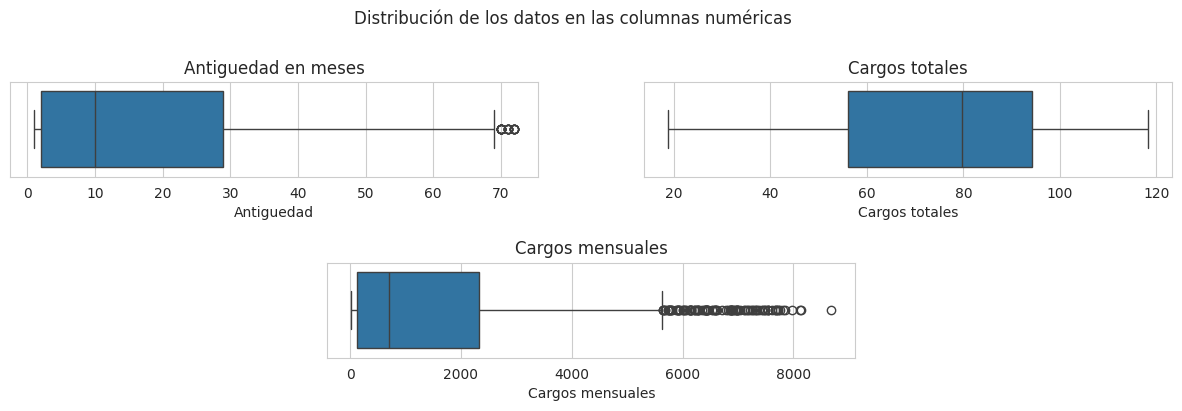

In [263]:

bd_aux = bd.loc[bd["Fuga_Cliente"]==1,:]
columnas_numericas = ["Antiguedad_Meses","Cargos_Mensuales","Cargos_Totales"]

sns.set_style("whitegrid")

fig = plt.figure(figsize=(15,4))
fig.suptitle("Distribución de los datos en las columnas numéricas")
fig.subplots_adjust(hspace=0.9, wspace=0.5, top=0.80)

gs = fig.add_gridspec(2,4)

x1 = fig.add_subplot(gs[0,0:2])
x2 = fig.add_subplot(gs[0,2:4])
x3 = fig.add_subplot(gs[1,1:3])

sns.boxplot(x=bd_aux[columnas_numericas[0]], ax=x1)
sns.boxplot(x=bd_aux[columnas_numericas[1]], ax=x2)
sns.boxplot(x=bd_aux[columnas_numericas[2]], ax=x3)

x1.set_xlabel("Antiguedad")
x2.set_xlabel("Cargos totales")
x3.set_xlabel("Cargos mensuales")

x1.set_title("Antiguedad en meses")
x2.set_title("Cargos totales")
x3.set_title("Cargos mensuales")

plt.show()


In [264]:
def generar_quartiles(df, columnas):
  list_aux = []
  for columna in columnas:
    list_aux.append(pd.DataFrame(df[columna].quantile([0.25,0.50,0.75])))

  return list_aux

quartiles_list = generar_quartiles(bd_aux, columnas_numericas)

df_quartiles = quartiles_list[0].join(quartiles_list[1:3], how="inner")
df_quartiles.index = ["Q1","Q2","Q3"]
df_quartiles



,Antiguedad_Meses,Cargos_Mensuales,Cargos_Totales
Q1,2.0,56.15,134.5
Q2,10.0,79.65,703.55
Q3,29.0,94.2,2331.3


#📄Informe final

In [265]:
def generar_bigotes(df,columnas):
  list_aux = []
  for columna in columnas:
    IQR = df[columna].quantile(0.75)-df[columna].quantile(0.25)
    LI =  df[columna].quantile(0.25)-(IQR*1.5)
    LS = df[columna].quantile(0.75)+(IQR*1.5)

    diccionario = {"Extremo inferior":[LI], "Extremo superior":[LS]}

    aux = pd.DataFrame(diccionario).T
    aux.columns = [columna]

    list_aux.append(aux)

  return list_aux

limites_list = generar_bigotes(bd_aux, columnas_numericas)

df_limites = limites_list[0].join(limites_list[1:3], how="inner")
df_limites


,Antiguedad_Meses,Cargos_Mensuales,Cargos_Totales
Extremo inferior,-38.5,-0.925,-3160.7
Extremo superior,69.5,151.275,5626.5


In [266]:
pd.concat([df_quartiles, df_limites], axis=0)

,Antiguedad_Meses,Cargos_Mensuales,Cargos_Totales
Q1,2.0,56.15,134.5
Q2,10.0,79.65,703.55
Q3,29.0,94.2,2331.3
Extremo inferior,-38.5,-0.925,-3160.7
Extremo superior,69.5,151.275,5626.5


# Informe final sobre la tasa de abandono de clientes

## Introducción

  En este informe se hablará sobre la información obtenida mediante el análisis y proceso de ETL aplicado a una base de datos propiedad de la empresa 'Telecom X', la cual contiene información sobre clientes que abandonaron la empresa y otros atributos demográficos y de servicios.

  Este informe tiene como propósito brindar una visión sobre la proporción de clientes que abandonaron la empresa en relación con variables tanto numéricas como categóricas encontradas dentro del conjunto de datos. Para ello, se utiliza estadística descriptiva y medidas de tendencia central para entender la distribución y comportamiento de los datos, apoyando los resultados con gráficos para facilitar su visualización e interpretación.

##  Limpieza y tratamiento de datos

La primera acción realizada fue extraer los datos en formato JSON desde una API proporcionada por 'Telecom X'. Dicha información se presentaba como un JSON anidado (nested JSON) que impedía la lectura directa; por lo tanto, se utilizó la función json_normalize() de la librería Pandas para aplanar la estructura.

Posteriormente, tras transformar el formato y convertirlo en un DataFrame, se renombraron las columnas del inglés al español para facilitar la interpretación y manipulación del conjunto de datos.

Tras el proceso de importación, se llevó a cabo la limpieza de datos en tres fases:

  * Identificación de tipos de datos incorrectos: Se detectó que la columna 'Cargos_Totales' figuraba como tipo object.

  * Tratamiento de datos irregulares: Se identificaron valores de texto no válidos, los cuales se convirtieron a np.nan para su posterior eliminación.

  * Conversión de tipos: Una vez limpia, la columna 'Cargos_Totales' se transformó de object a float64.

Posteriormente, se verificó el contenido de cada columna, lo que permitió descubrir elementos irregulares (espacios en blanco) en la columna 'Fuga_Cliente'. Estos se convirtieron a pd.NA y fueron eliminados, ya que representaban solo el 3% de la base de datos.

A la par de este proceso, se realizó una codificación numérica (binarización), reemplazando las etiquetas 'Yes' por 1 y 'No' por 0 (exceptuando la columna 'Servicio_Internet'). Asimismo, se sustituyeron los valores 'No internet service' y 'No phone service' por 0, interpretándolos como la ausencia del servicio. Finalmente, se procedió a realizar el casting de cada columna a los tipos de datos más eficientes y adecuados, tales como Int64, Float64 o string.

## Análisis Exploratorio de Datos

En la etapa inicial del análisis, se cuantificó la tasa de deserción global mediante un gráfico de sectores (pastel). Esta visualización permite dimensionar la proporción de clientes que finalizaron su contrato frente a los que permanecen activos. Los resultados indican que el 73% de la base de clientes se mantuvo leal a la compañía, mientras que un 27% (tasa de churn) optó por abandonar el servicio durante el periodo evaluado.

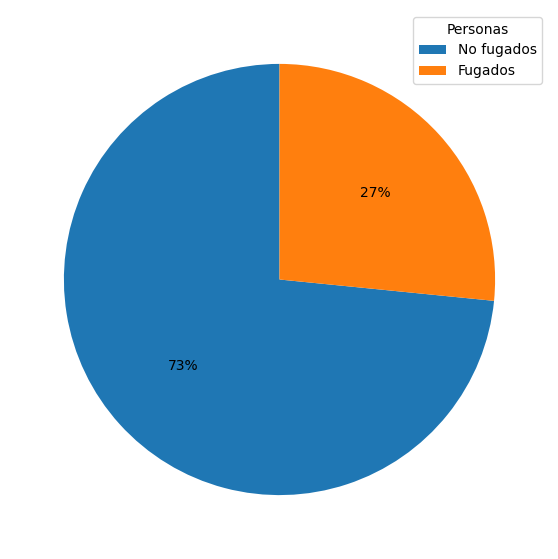

Tras el análisis de los factores determinantes, se generó una matriz comparativa que detalla la tasa de deserción según las variables categóricas con mayor índice de abandono.


| Fuga_Cliente   |   Servicio_Telefonico_1 |   Tipo_Contrato_Month-to-month |   Seguridad_Online_0 |   Soporte_Tecnico_0 |   Cliente_ConDependientes_0 |
|:---------------|------------------------:|-------------------------------:|---------------------:|--------------------:|----------------------------:|
| No fugaron     |                    4653 |                           2220 |                 3443 |                3433 |                        3390 |
| Si fugaron     |                    1699 |                           1655 |                 1574 |                1559 |                        1543 |

Posteriormente, se generaron tres gráficos de caja y bigotes (boxplots) para comprender mejor la distribución de los datos en las columnas numéricas. Estos se complementaron con una tabla adicional que especifica los cuartiles exactos por categoría, además de mostrar los valores de los "bigotes", los cuales delimitan el umbral a partir del cual un dato es considerado un valor atípico (outlier). Al centrar el estudio exclusivamente en los usuarios que abandonaron la empresa, este análisis permitió identificar con precisión los segmentos donde se concentró la mayor tasa de deserción.

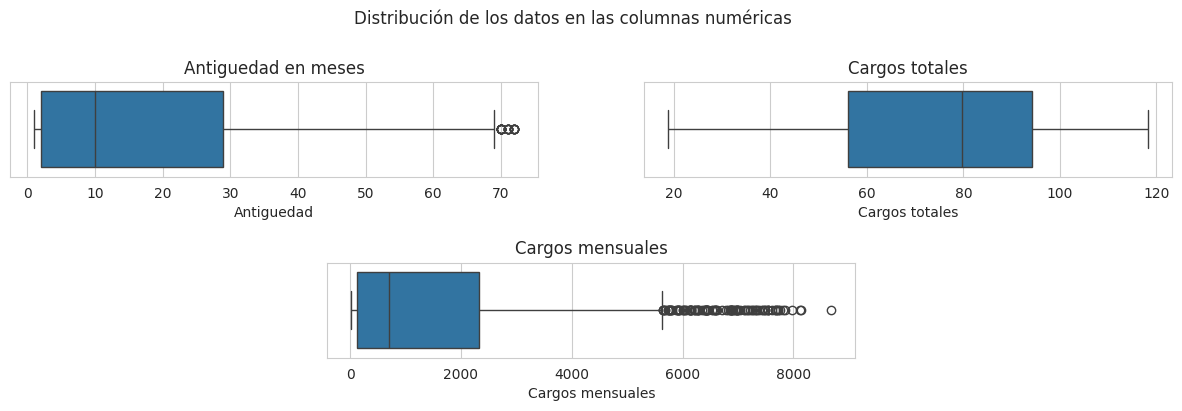

## Conclusiones e Insights

Los hallazgos revelan que el perfil con mayor tendencia al abandono (churn), según las variables categóricas, se caracteriza por:

  * Tipo de contrato: Contratación mensual (mes a mes).

  * Servicios adicionales: Ausencia de seguridad online y falta de soporte técnico.

  * Servicios básicos: Usuarios con servicio telefónico activo.

  * Perfil demográfico: Clientes sin dependientes económicos.

Por otro lado, en cuanto a las variables numéricas, el perfil se define de la siguiente manera:

  * Antigüedad: El 75% de los clientes que desertaron tenían una permanencia de entre 0 y 29 meses, lo que indica una fuga temprana.

  * Cargos Mensuales: El 75% de los desertores pagaban cargos de hasta 94.2 dólares.

  * Cargos Totales: El 75% de las bajas se concentraron en clientes con una facturación acumulada de entre 0 y 703.55 dólares.

  ## Recomendaciones

  Recomendaciones Estratégicas

Basado en el perfil de riesgo identificado, se proponen las siguientes líneas de acción:

  * Auditoría de Calidad Técnica: Realizar una investigación profunda sobre posibles deficiencias en los servicios telefónicos, dado que este grupo presenta una alta tasa de deserción.

  * Optimización Contractual: Implementar encuestas de satisfacción específicas para evaluar la conformidad de los clientes con los modelos de contrato actuales, buscando identificar por qué el formato "mes a mes" facilita la fuga.

  * Fortalecimiento del Valor Agregado: Evaluar, mediante encuestas de salida o de percepción, si la inclusión de servicios de seguridad online y soporte técnico en los paquetes básicos podría actuar como un factor de retención crítico.

  * Análisis de Sensibilidad al Precio: Consultar a los clientes si el factor económico es el principal agravante en su decisión de abandonar la empresa, considerando que el 75% de las bajas se concentran en cargos mensuales de hasta 94.2 dólares.

  * Programa de Retención Temprana: Diseñar y ejecutar un plan de fidelización prioritario para clientes con una antigüedad menor a 29 meses, ya que este segmento representa la mayor vulnerabilidad para la compañía.

  Estas recomendaciones ayudarán a la empresa a entender más a profundidad las razones por las cuales los clientes abandonan la compañía, ya sea por motivos de inconformidad con el servicio o por la capacidad económica del usuario.
